In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy
import scipy.special

Populating the interactive namespace from numpy and matplotlib


# Question #1
Assume that $f(\cdot)$ is an infinitely smooth and continuous scalar function. Suppose that $a\in \mathbb{R}$ is a given constant in the domain of the function $f$ and that $h>0$ is a given parameter assumed to be small. Consider the following numerical approximation of a first derivative,
$$ f'(a) \approx c_h(a) =  \frac{f(a+h) - f(a - h)}{2h}.$$

A. Use a Taylor's series expansion of the function $f$ around $a$ to show that the approximation error is $O(h^2)$ provided that $f'''(a) \neq 0$.

B. What happens to the error if $f'''(a) = 0$?


-------------------------------------
## Solution
A.
The absolute error is
$$\mathcal{E}_{\rm abs} = \left \vert\frac{f(x+h) - f(x - h)}{2h} - f'(x) \right \vert. $$
To derive the error, we expand our function in a Taylor's series, with
$$ f(a \pm h) = f(a) \pm h f'(a) + \frac{h^2}{2}f''(a) \pm \frac{h^3}{6} f'''(a) + O(h^4) $$
Substituting the Taylor's series into the absolute error yields
\begin{align*}
\mathcal{E}_{\rm abs} &= \left \vert
\frac{1}{2h}\left(hf'(a) + \frac{h^2}{2}f''(a) + \frac{h^3}{6} f'''(a) + O(h^4) + hf'(a) - \frac{h^2}{2}f''(a) + \frac{h^3}{6} f'''(a) - O(h^4)\right) \right \vert \\
  &= \left \vert f'(a) + \frac{h^2}{6}f'''(a) + O(h^4) - f'(a)\right \vert \\
  &= \left \vert  \frac{h^2}{6}f'''(a) + O(h^4) \right \vert \\
  &= \frac{h^2}{6}\left \vert  f'''(a)\right \vert + O(h^4) 
\end{align*}

B. The above expansion must be extended by two additional term so that it includes the fifth derivative of $f$. The next nonzero term in the Taylor's series expansion of the error is $O(h^4)$, namely 
$$ \frac{h^4}{5!}f^{(5)}(a). $$
Note that the $O(h^3)$ cancels out.

# Question #2
Use Example 2 in the Week 2 Jupyter notebook as a starting point. Copy the code and paste it into a new cell (you should be using a copy of the Week 2 notebook or a new notebook).

A. Compute the derivative approximation derived in Q1 for the function $f(x) = \sin(x)$ at the point $x=1.2$ for a range of values $10^{-20} \leq h \leq 10^{-1}$. 
$$$$
B. Compute the absolute error between the approximation and the exact derivative for a range of values $10^{-20} \leq h \leq 10^{-1}$. 

(For parts A and B, turn in a screen shot of your code.)

C. Create a plot of the absolute error. Add a plot of the discretization error that you derived in Q1. Is the derivative approximation that you derived in Q1 more accurate than the approximation used in Example 2? 

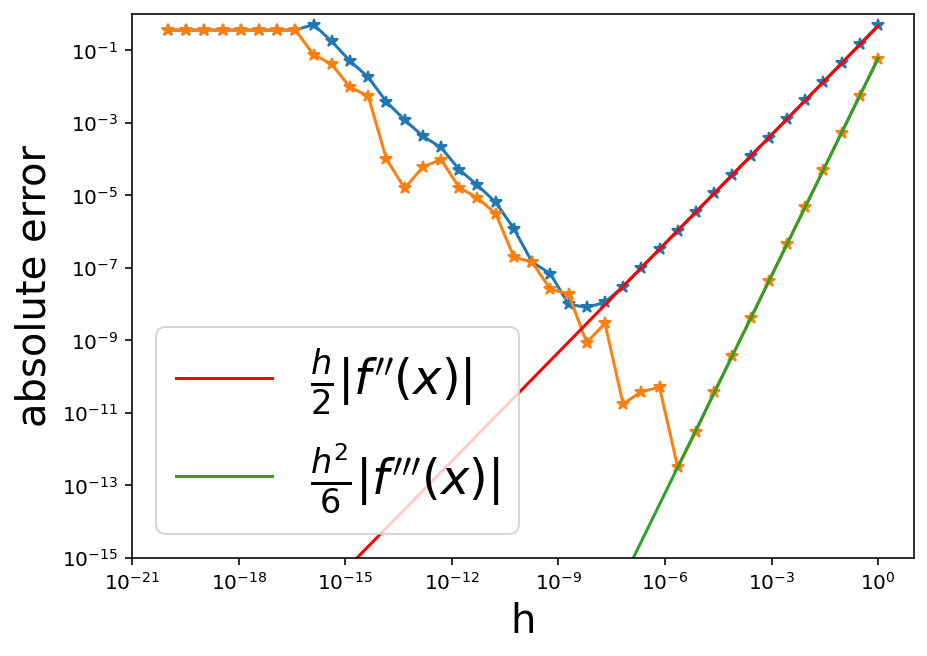

In [2]:
x0 = 1.2
f0 = sin(x0)
fp = cos(x0)
fpp = -sin(x0)
fppp = -cos(x0)
i = linspace(-20, 0, 40)
h = 10.0**i
fp_approx = (sin(x0 + h) - f0)/h
fp_center_diff_approx = (sin(x0 + h) - sin(x0 - h))/(2*h)
err = absolute(fp - fp_approx)
err2 = absolute(fp - fp_center_diff_approx)
d_err = h/2*absolute(fpp) 
d2_err = h**2/6*absolute(fppp)

figure(1, [7, 5])
loglog(h, err, '-*')
loglog(h, err2, '-*')
loglog(h, d_err, 'r-', label=r'$\frac{h}{2}\vert f^{\prime\prime}(x) \vert $')
loglog(h, d2_err, label=r'$\frac{h^2}{6}\vert f^{\prime\prime\prime}(x) \vert $')
xlabel('h', fontsize=20)
ylabel('absolute error', fontsize=20)
ylim(1e-15, 1)
legend(fontsize=24);

The centered difference formula is more accurate for (roughly) $h>10^{-8}$. After the cancelation error takes over, the two errors are roughly comparable.